# Import Libraries

In [ ]:
#General
import numpy as np
import pandas as pd
import itertools

# System
import os, fnmatch
import time

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
!pip install -q umap-learn
import umap.umap_ as umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

In [ ]:
# Root Directory of project
root = "/content/drive/MyDrive/ML_Final_Project"

# Load Features

In [ ]:
features = pd.read_csv(f'{root}/Features/MFCC.csv', index_col=0)
features

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15997,1,1,1,21,-273.89975,109.914710,-27.178843,24.050000,-30.668251,7.612669,-32.395473,-14.576503,10.577414,-4.430114,-14.836465,4.711704,7.049230
1,16001,1,2,1,21,-262.88242,109.629010,-13.443775,18.656229,-17.951504,9.419722,-28.762785,-16.300575,2.878427,-3.965334,-5.139730,-1.002245,4.031993
2,16005,1,3,1,21,-326.58148,60.505104,-21.587154,48.611760,-4.395157,16.118166,-30.941092,8.018489,5.544771,-5.991427,-6.399820,-3.664392,-2.098389
3,16009,1,4,1,21,-306.34730,74.334130,-5.936096,26.786450,-17.253584,4.249269,-25.107138,-2.077201,-10.063375,-13.074363,-1.516927,-0.688974,3.916486
4,16013,1,5,1,21,-272.34177,101.913376,-17.402200,17.161690,-32.563335,-1.015059,-37.220806,-5.984633,3.240388,-5.720155,-6.592540,-7.537375,9.101556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,10563,4,6,0,54,-312.99890,83.493286,19.964092,-2.189093,-8.052568,8.817256,0.923595,2.250675,-4.261540,-3.527034,-4.379839,-2.800457,-2.772394
16436,10567,4,7,0,54,-293.31683,87.924740,19.781424,20.599514,-5.998958,-0.776978,-6.013906,-4.710018,-4.548595,-6.986614,-11.384063,-4.966642,-0.050604
16437,10571,4,8,0,54,-401.16852,85.599630,8.782131,15.285742,2.952115,-5.438883,-4.962066,-7.098472,-5.790778,2.221919,-8.279410,-4.310554,0.981393
16438,10575,4,9,0,54,-389.98862,71.494570,19.549135,20.339664,-8.362865,-8.162744,1.794381,-4.132726,-10.336851,-5.961664,-5.687753,-1.245518,-2.261302


In [ ]:
X = features.drop(['emotion_id', 'voice_id', 'text_id'], 1)
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,gender,age,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,21,-273.89975,109.914710,-27.178843,24.050000,-30.668251,7.612669,-32.395473,-14.576503,10.577414,-4.430114,-14.836465,4.711704,7.049230
1,1,21,-262.88242,109.629010,-13.443775,18.656229,-17.951504,9.419722,-28.762785,-16.300575,2.878427,-3.965334,-5.139730,-1.002245,4.031993
2,1,21,-326.58148,60.505104,-21.587154,48.611760,-4.395157,16.118166,-30.941092,8.018489,5.544771,-5.991427,-6.399820,-3.664392,-2.098389
3,1,21,-306.34730,74.334130,-5.936096,26.786450,-17.253584,4.249269,-25.107138,-2.077201,-10.063375,-13.074363,-1.516927,-0.688974,3.916486
4,1,21,-272.34177,101.913376,-17.402200,17.161690,-32.563335,-1.015059,-37.220806,-5.984633,3.240388,-5.720155,-6.592540,-7.537375,9.101556


In [ ]:
y = features['emotion_id']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: emotion_id, dtype: int64

# Function To Plot Data

In [ ]:
def plot_dimensions_reductioned_data(ax, df):

    df_angry = []
    df_sad = []
    df_happy = []
    df_neutral = []

    
    for i,n in enumerate(df):

        if y[i]==1: df_angry.append(n)
        elif y[i]==2: df_sad.append(n)
        elif y[i]==3:df_happy.append(n)
        elif y[i]==4:df_neutral.append(n)

    df_angry = np.array(df_angry)
    df_sad =  np.array(df_sad)
    df_happy =  np.array(df_happy)
    df_neutral =  np.array(df_neutral)

    ax.scatter(df_angry[:,0] , df_angry[:,1] , label = 'angry',color="r")
    ax.scatter(df_sad[:,0] , df_sad[:,1] , label = 'sad',color="b")
    ax.scatter(df_happy[:,0] , df_happy[:,1] , label = 'happy',color="g")
    ax.scatter(df_neutral[:,0] , df_neutral[:,1] , label = 'neutral',color="k")

    
    ax.set_title('Orginal data', fontsize=20)

    ax.legend()

# Dimension Reduction

## tSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


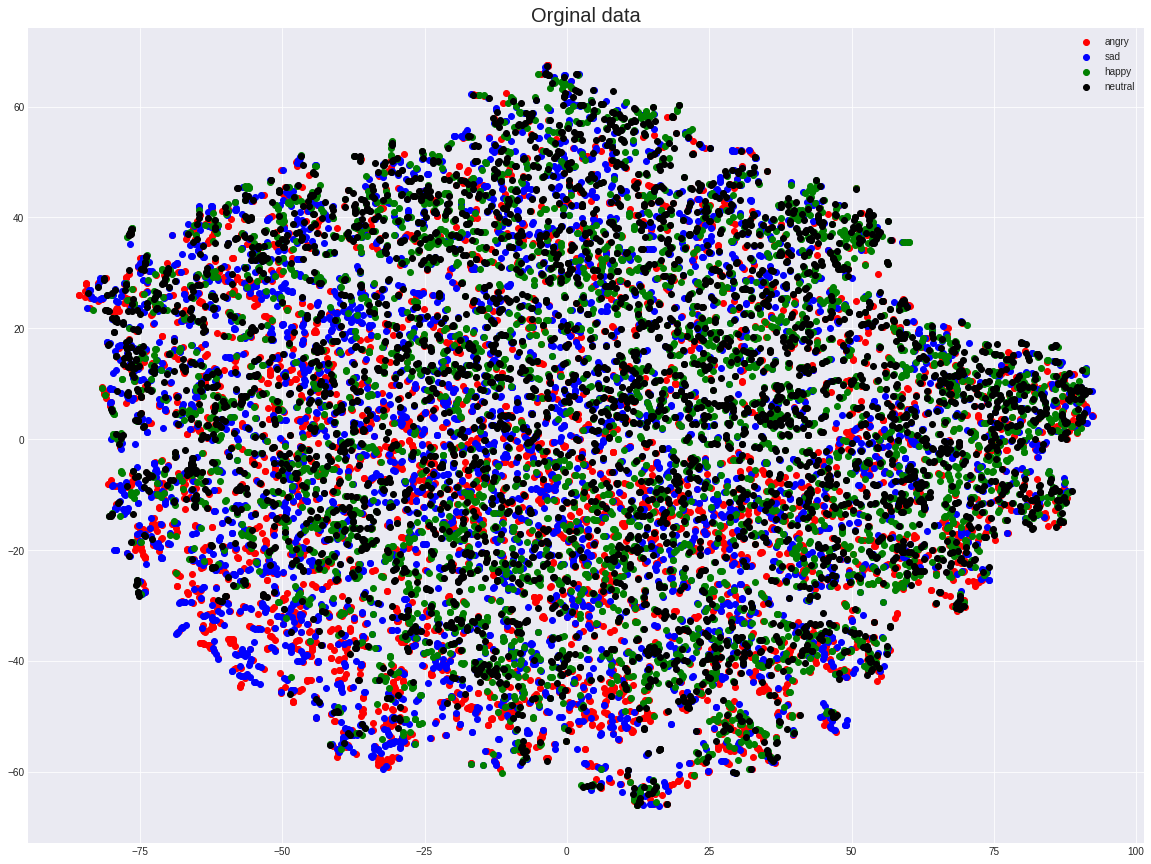

In [ ]:
tSNE=TSNE(n_components=2)
df=tSNE.fit_transform(X)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, df)

## PCA

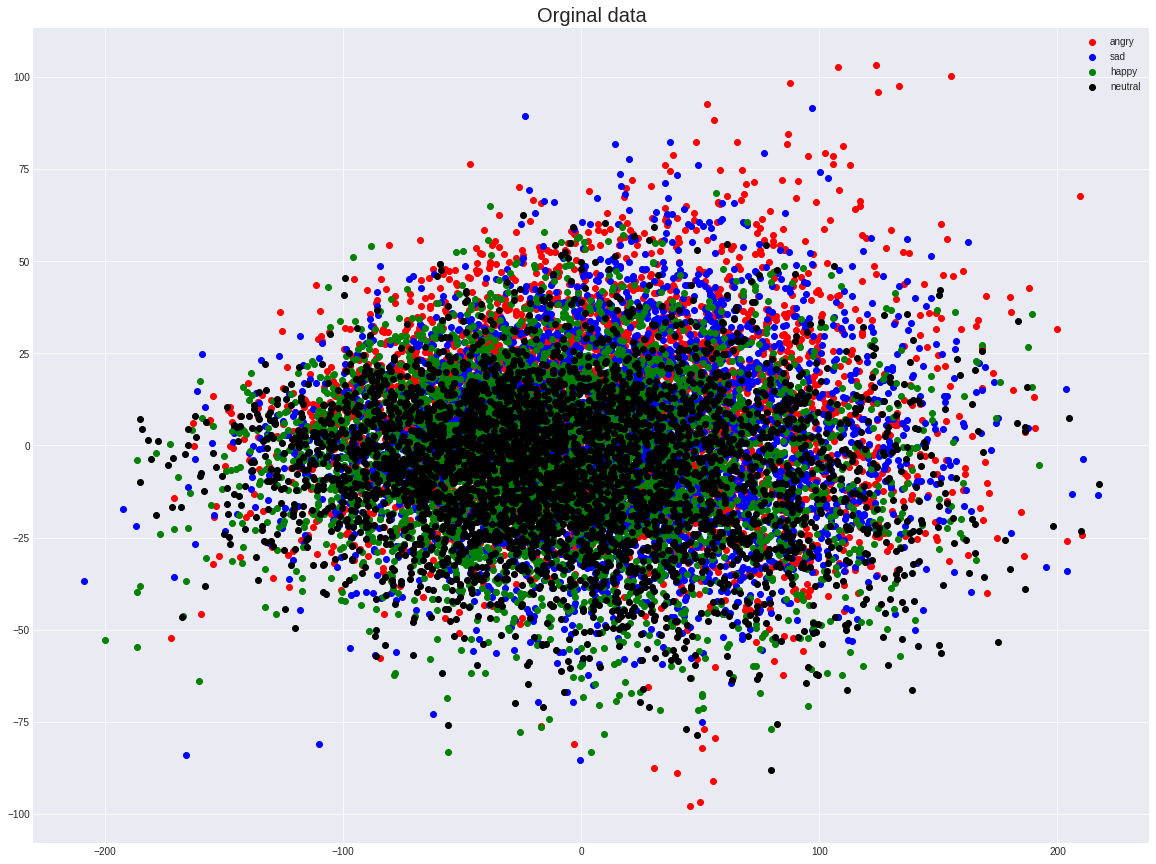

In [ ]:
pca = PCA(2)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, pca.fit_transform(X))

## uMAP

(16440, 2)


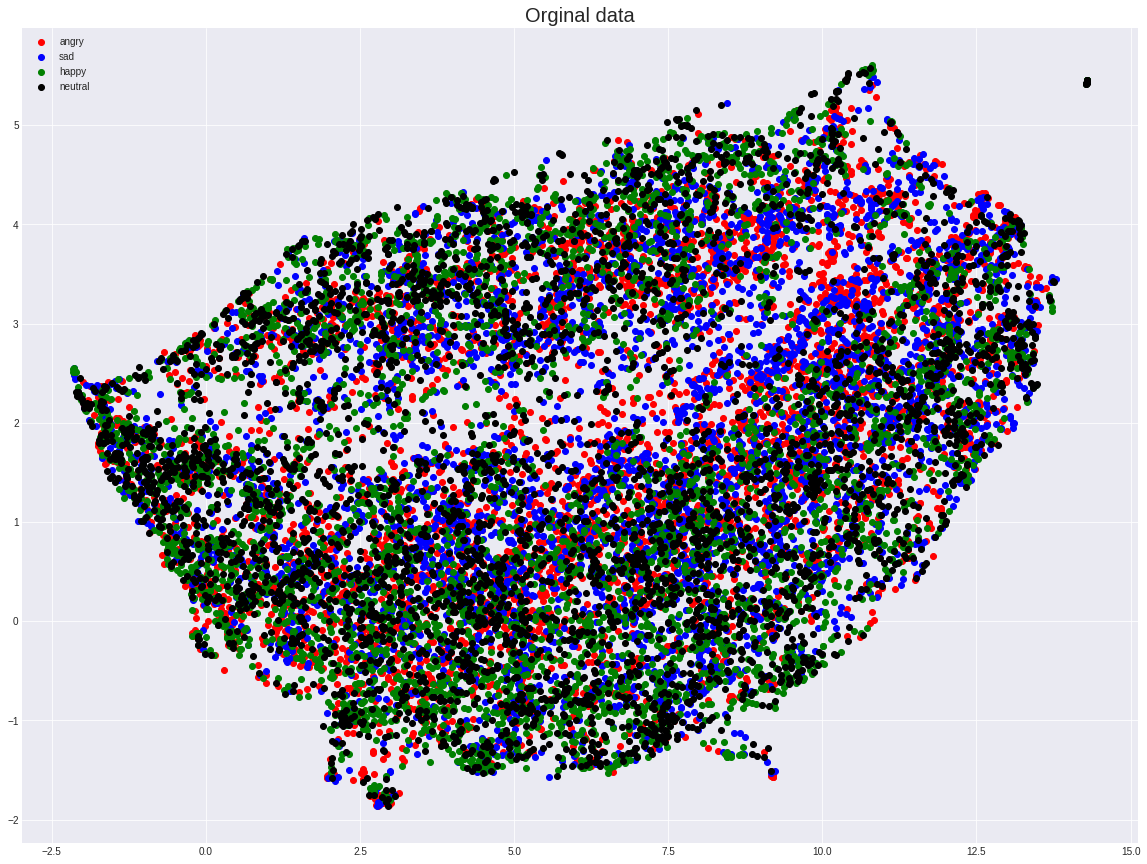

In [ ]:
reducer = umap.UMAP()
df = reducer.fit_transform(X)
print(df.shape)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, df)

## LDA

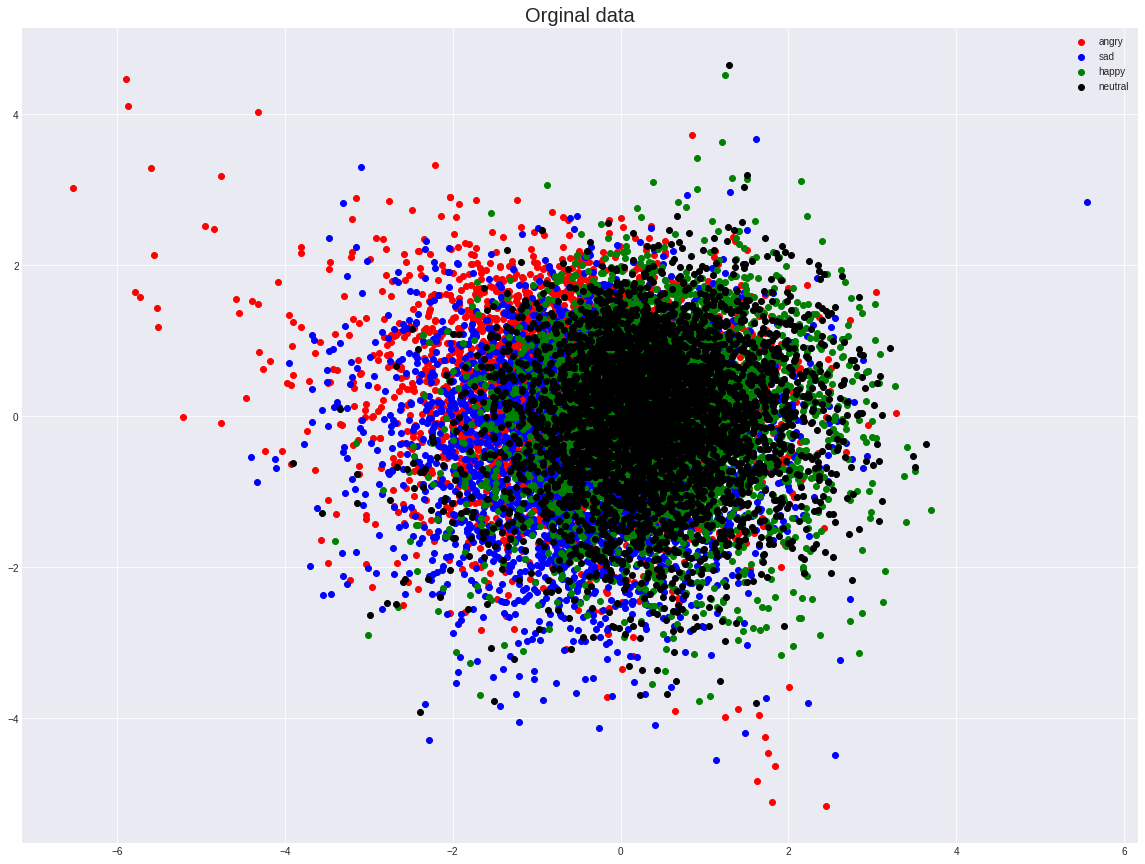

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
df = lda.fit(X, y).transform(X)
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plot_dimensions_reductioned_data(ax, df)

# Function for Kmean Clustering

In [ ]:
def kmean_clusters(ax, data,n_clusters):
    #Initialize the class object
    kmeans = KMeans(n_clusters= n_clusters)
    #predict the labels of clusters.
    # kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
    classes = kmeans.fit_predict(data) 
    #print('clustring labels = ',classes)
    
    #Getting the Centroids
    centroids = kmeans.cluster_centers_
    u_labels = np.unique(classes)

    #plotting the results:
  
    #ax.figure.set_size_inches(16, 8)
    for i in u_labels:
        ax.scatter(data[classes == i , 0] , data[classes == i , 1] , label = i)
    ax.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax.legend()
    ax.set_title("K-Means clustring", fontsize=20)

# Function for Agglomerative Clustering

In [ ]:
def Agglomerative_clusters(ax, data,n_clusters):
    #Creating the model
    #linkage = 'complete' -> ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'complete')
    
    #predict the labels of clusters.
    #fit_predict method returns the array of cluster labels each data point belongs to.
    classes = agg_clustering.fit_predict(df)
   
    #print('clustring labels = ',classes)
    
    #Getting the Centroids
    from sklearn.neighbors import NearestCentroid
    clf = NearestCentroid()
    clf.fit(df, classes)
    centroids = clf.centroids_
    u_labels = np.unique(classes)

    #plotting the results:
    #ax.figure.set_size_inches(16, 8)
    for i in u_labels:
        ax.scatter(data[classes == i , 0] , data[classes == i , 1] , label = i)
    ax.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax.legend()
    ax.set_title("Agglomerative clustring", fontsize=20)

# Plot Clusterings

In [ ]:
def plot_clustering(data,n_clusters):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,8))
    fig.subplots_adjust(wspace=.1)
    Agglomerative_clusters(ax1,data,n_clusters)
    plot_dimensions_reductioned_data(ax2,df)
    kmean_clusters(ax3,data,n_clusters)

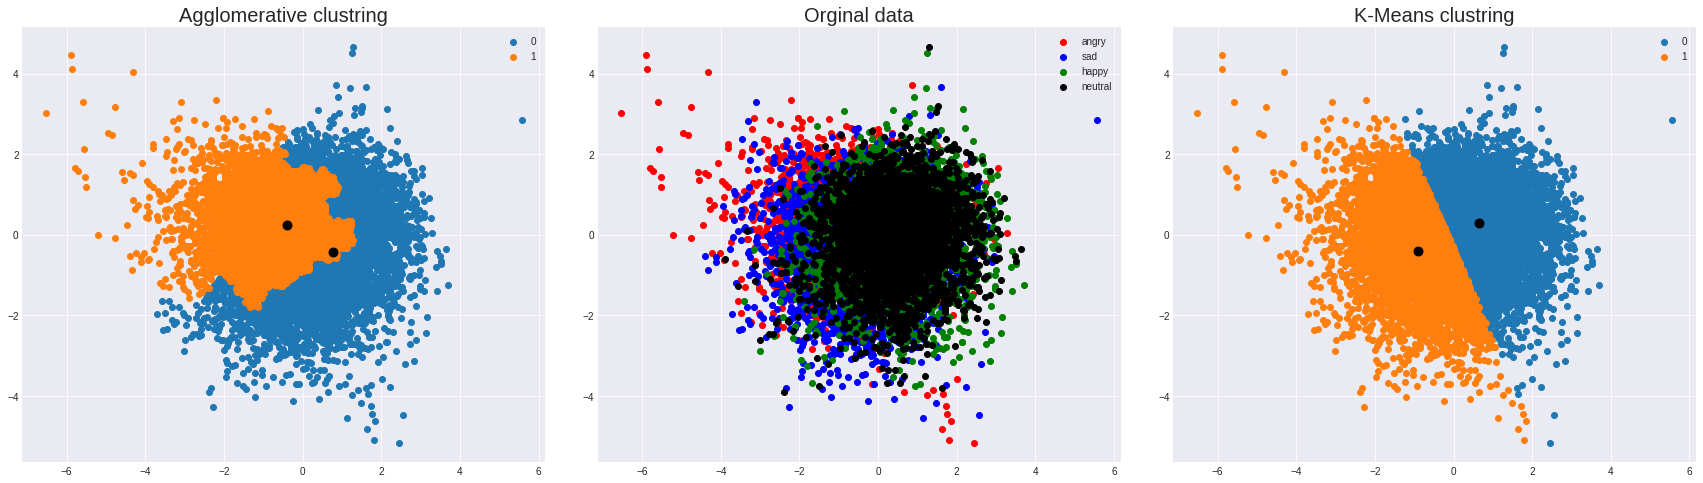

In [ ]:
plot_clustering(df,2)

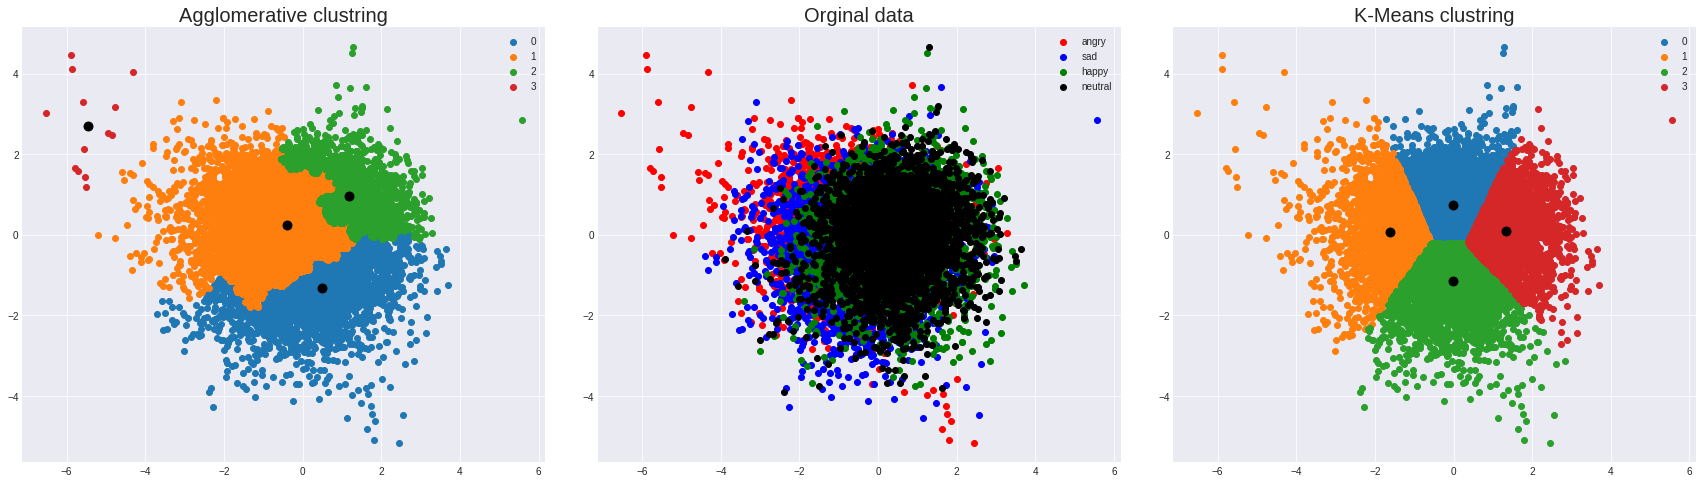

In [ ]:
plot_clustering(df,4)

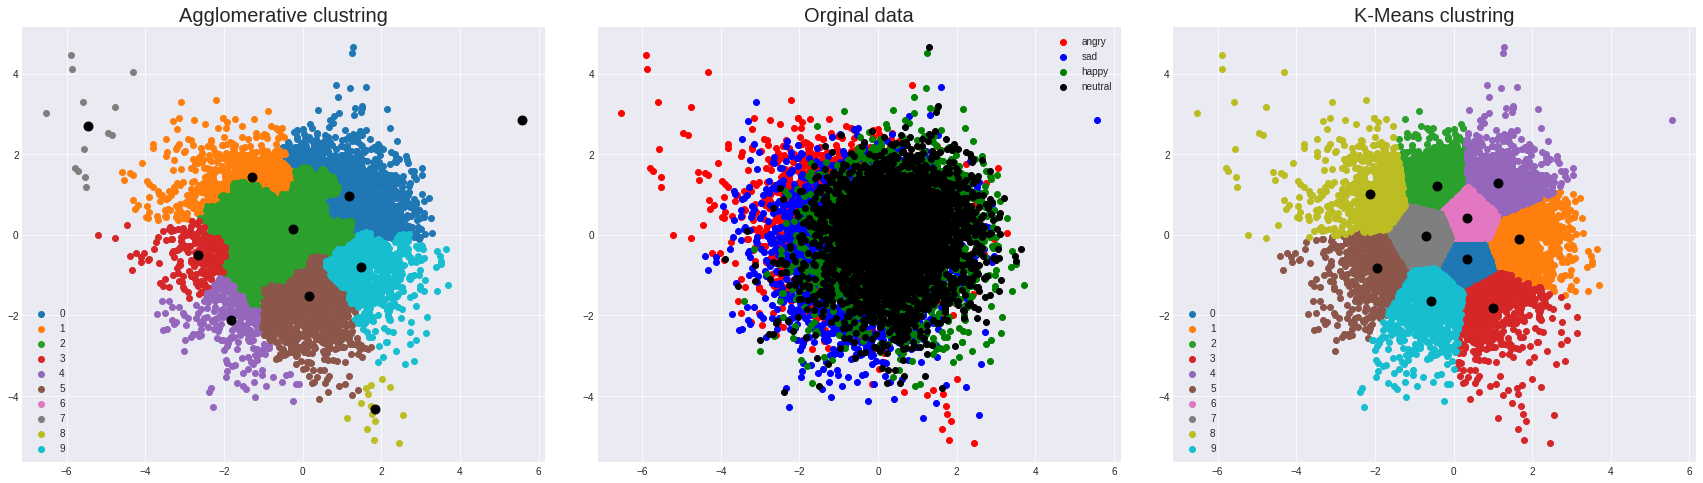

In [ ]:
plot_clustering(df,10)

# Clustering on Original Data

 33%|███▎      | 1/3 [00:04<00:09,  4.96s/it]



KMeans for 2 Clusters

Homogenity Score: 0.004680597287387745

Silhouette Score: 0.3430510287356769


 67%|██████▋   | 2/3 [00:12<00:06,  6.36s/it]



KMeans for 4 Clusters

Homogenity Score: 0.0064444876312393755

Silhouette Score: 0.19724319103683294


100%|██████████| 3/3 [00:22<00:00,  7.33s/it]



KMeans for 10 Clusters

Homogenity Score: 0.02446137178888248

Silhouette Score: 0.12106650016827687


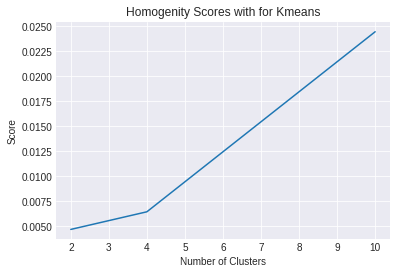

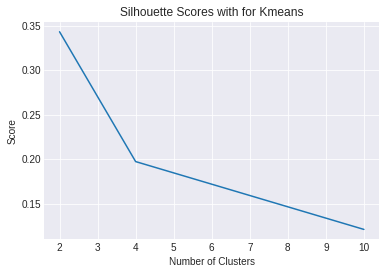

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics.cluster import homogeneity_score

n_clusters=[2,4,10]
sc_scores = []
hm_scores = []

for n in tqdm(n_clusters):
    km = KMeans(n_clusters=n)
    km.fit_predict(X)
    sc_score = silhouette_score(X, km.labels_, metric='euclidean')
    hm_score = homogeneity_score(y, km.labels_)
    print(f'\n\nKMeans for {n} Clusters')
    print('\nHomogenity Score:', hm_score)
    print('\nSilhouette Score:', sc_score)
    print('================================')
    sc_scores.append(sc_score)
    hm_scores.append(hm_score)

plt.title(f'Homogenity Scores with for Kmeans')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, hm_scores)
plt.show()
    
plt.title(f'Silhouette Scores with for Kmeans')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, sc_scores)
plt.show()

 33%|███▎      | 1/3 [00:21<00:42, 21.00s/it]



AgglomerativeClustering for 2 Clusters

Homogenity Score: 0.008183894997020524

Silhouette Score: 0.26320412117199415


 67%|██████▋   | 2/3 [00:37<00:18, 18.49s/it]



AgglomerativeClustering for 4 Clusters

Homogenity Score: 0.009444926420673983

Silhouette Score: 0.16283250553269102


100%|██████████| 3/3 [00:54<00:00, 18.16s/it]



AgglomerativeClustering for 10 Clusters

Homogenity Score: 0.016696417881814463

Silhouette Score: 0.05828887167685208


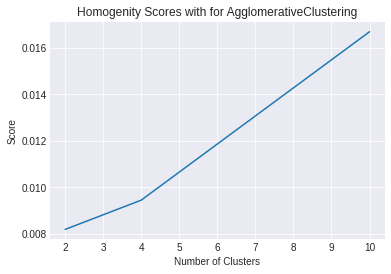

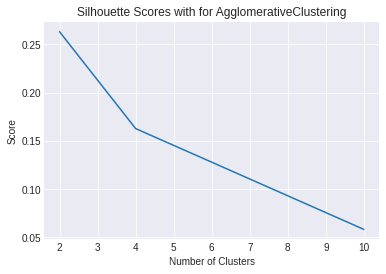

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=[2,4,10]
sc_scores = []
hm_scores = []

for n in tqdm(n_clusters):
    cl = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'complete')
    cl.fit_predict(X)
    sc_score = silhouette_score(X, cl.labels_, metric='euclidean')
    hm_score = homogeneity_score(y, cl.labels_)
    print(f'\n\nAgglomerativeClustering for {n} Clusters')
    print('\nHomogenity Score:', hm_score)
    print('\nSilhouette Score:', sc_score)
    print('================================')
    sc_scores.append(sc_score)
    hm_scores.append(hm_score)

    
plt.title(f'Homogenity Scores with for AgglomerativeClustering')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, hm_scores)
plt.show()
    
plt.title(f'Silhouette Scores with for AgglomerativeClustering')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.plot(n_clusters, sc_scores)
plt.show()